In [38]:
import numpy as np
import os
import sys
import tensorflow as tf
import time
from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
%matplotlib inline

In [39]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

In [40]:
#model prepration


ssd_inception_sim_model  = 'fine_tuned_model/sim_frcnn_2/frozen_inference_graph.pb'
PATH_TO_LABELS = 'data/label_map-sim.pbtxt'
NUM_CLASSES = 4

In [41]:
label_map= label_map_util.load_labelmap(PATH_TO_LABELS)
categories= label_map_util.convert_label_map_to_categories(label_map,max_num_classes=NUM_CLASSES
                                                           ,use_display_name=True)
categories_index=label_map_util.create_category_index(categories)
print(categories_index)

{1: {'id': 1, 'name': u'Green'}, 2: {'id': 2, 'name': u'Red'}, 3: {'id': 3, 'name': u'Yellow'}, 4: {'id': 4, 'name': u'off'}}


In [42]:
def load_image_into_numby_array(image):
    (img_width, img_height)= image.size
    return np.array(image.getdata()).reshape(
    (img_height,img_width,3)).astype(np.uint8)

In [43]:
from glob import glob

In [44]:
# detection

detection_graph=tf.Graph()

with detection_graph.as_default():
    od_graph_def= tf.GraphDef()
    with tf.gfile.GFile(ssd_inception_sim_model,'rb') as fid:
        serialized_graph= fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')
        
        
        

In [45]:
PATH_TO_TEST_IMAGE_DIR='data/test_data_sim'
print(os.path.join(PATH_TO_TEST_IMAGE_DIR,'*.jpg'))
TEST_IMAGE_PATHS=glob(os.path.join(PATH_TO_TEST_IMAGE_DIR,'*.jpg'))
print("Lengnth of Test Images", len(TEST_IMAGE_PATHS))

Images_Size=(16,12)

data/test_data_sim/*.jpg
('Lengnth of Test Images', 16)


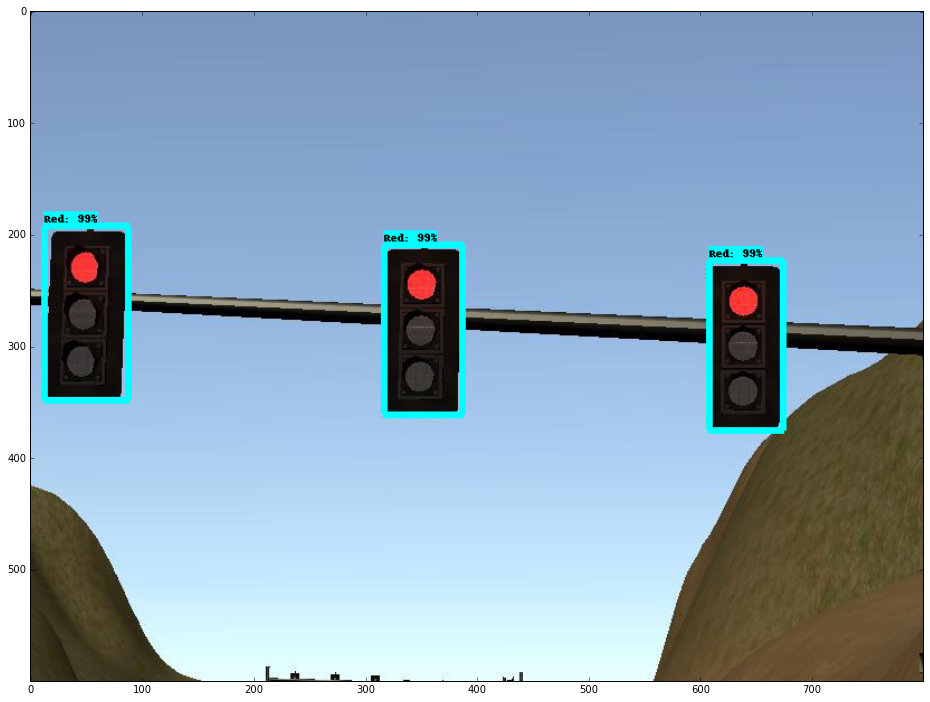

1


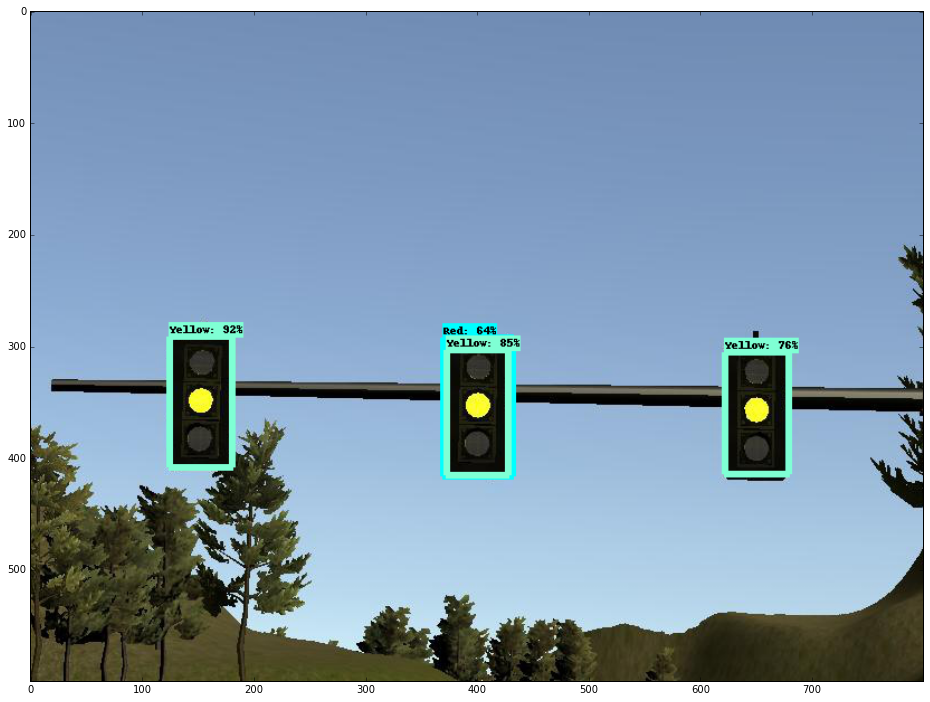

2


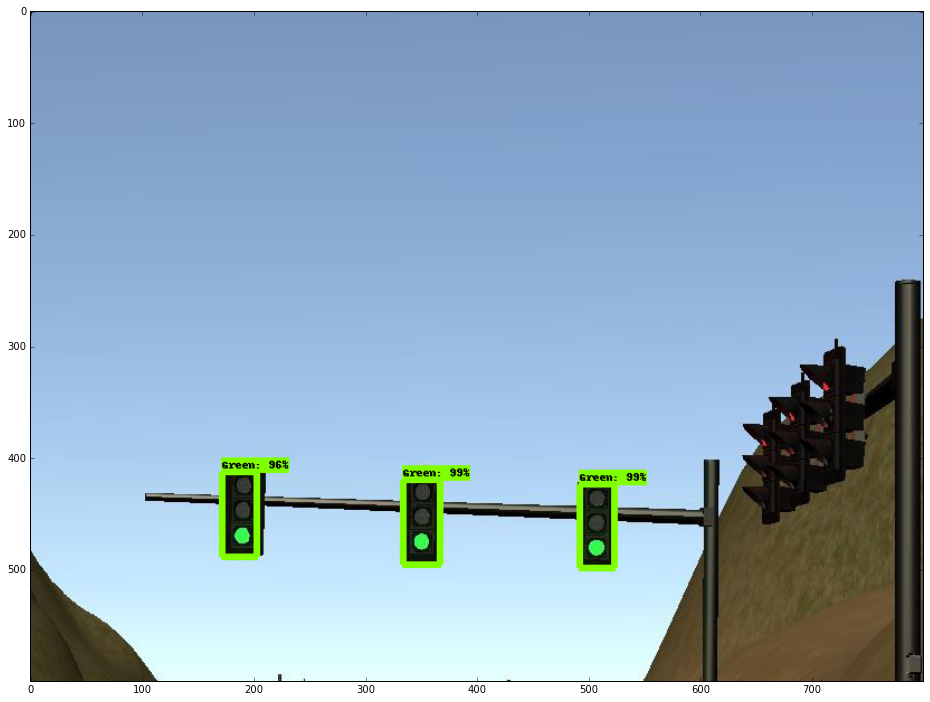

3


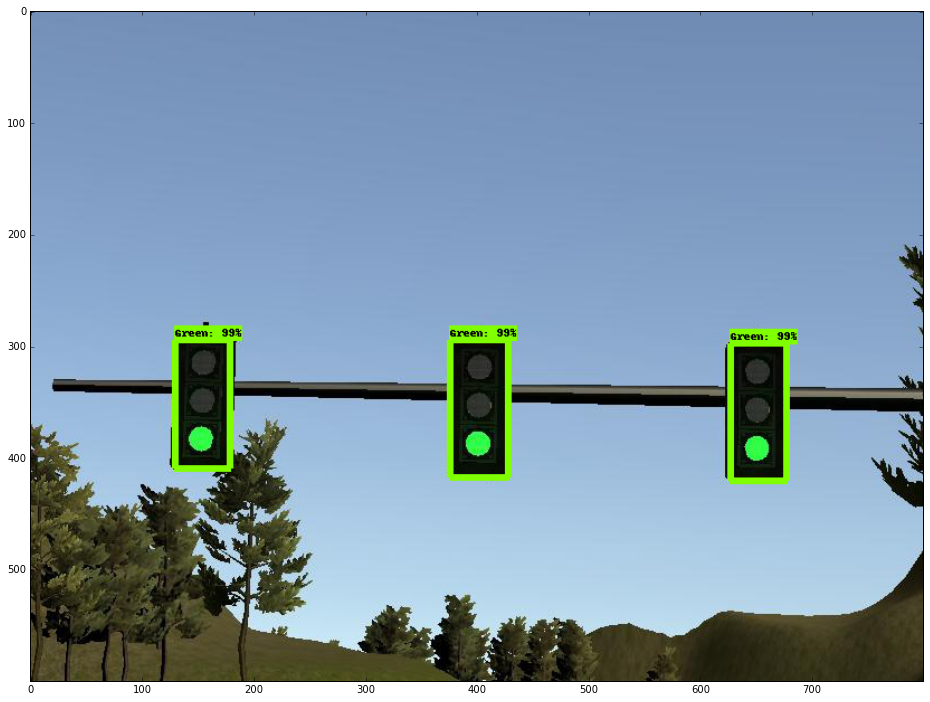

4


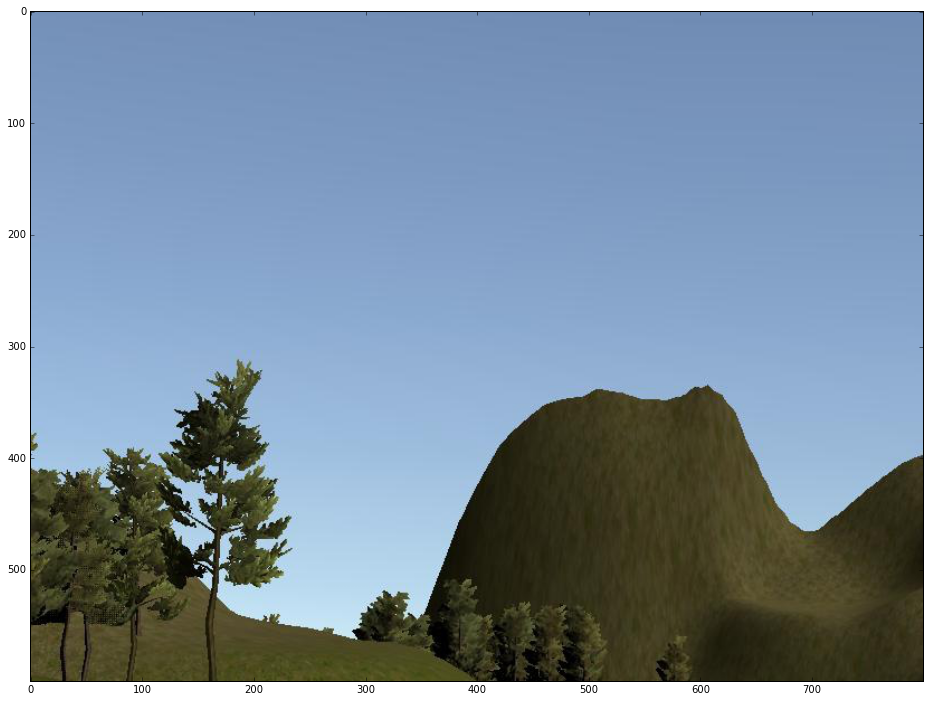

5


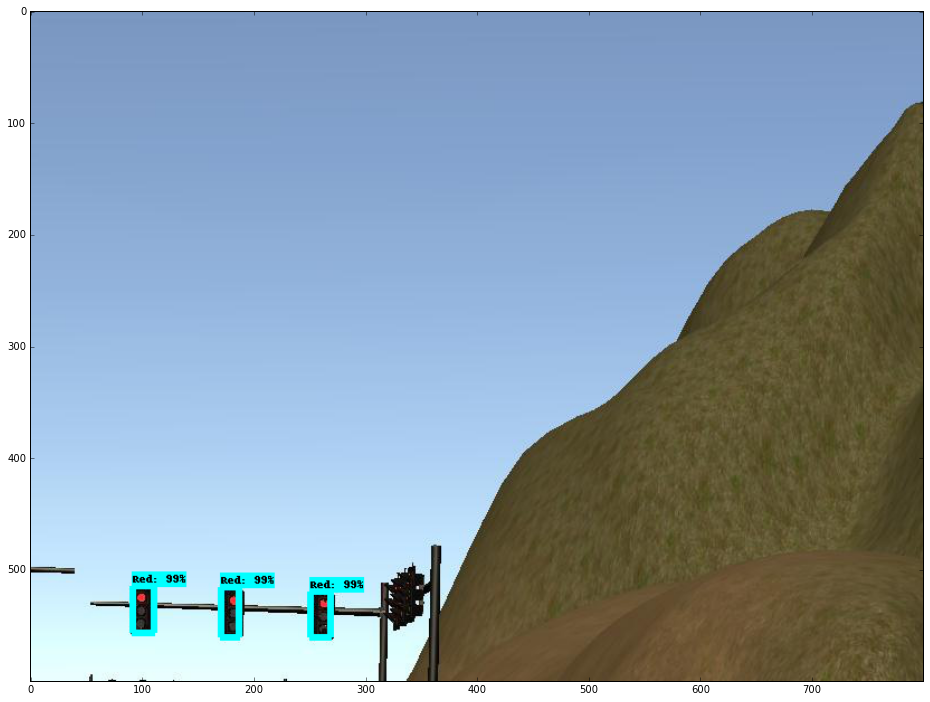

6


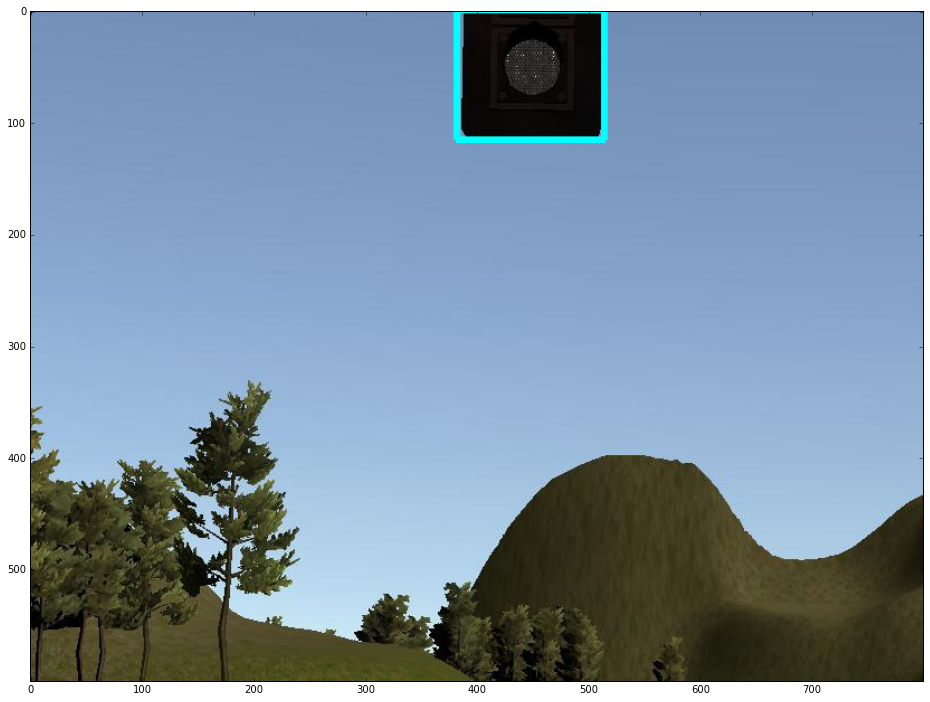

7


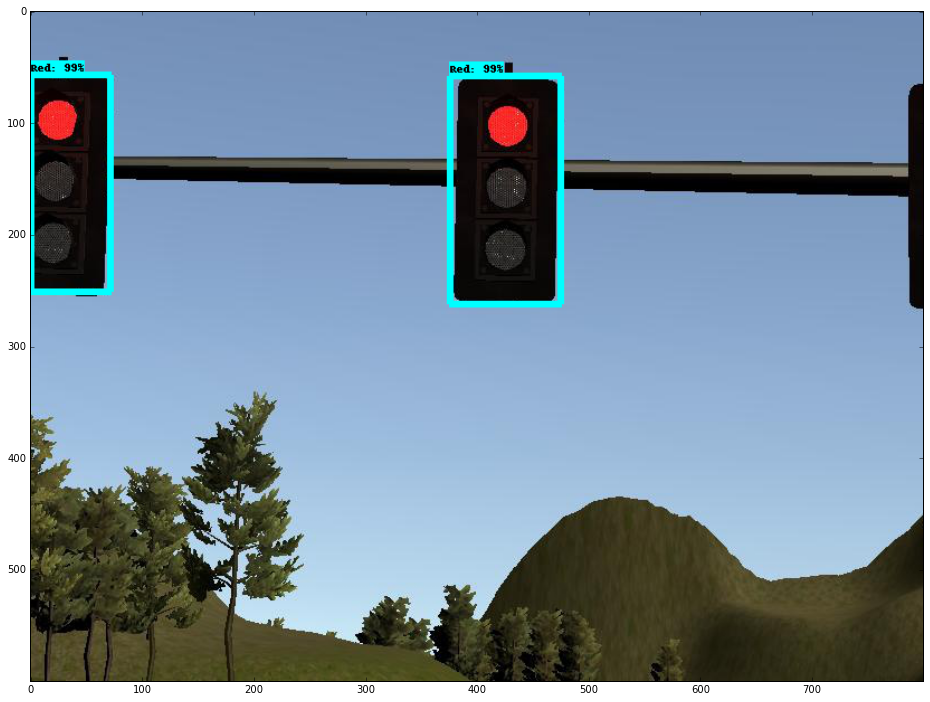

8


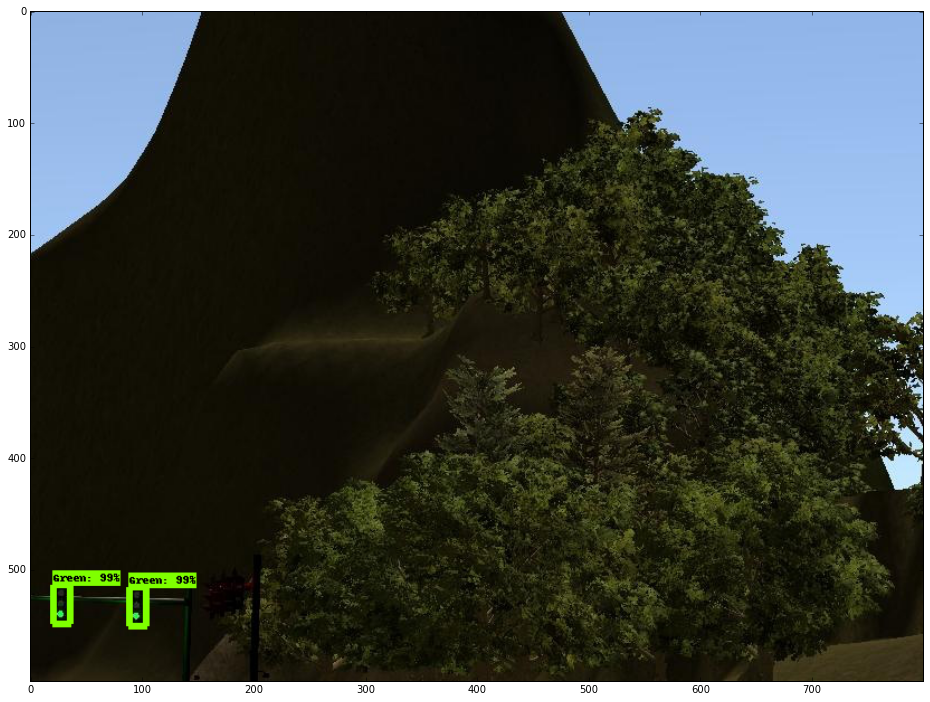

9


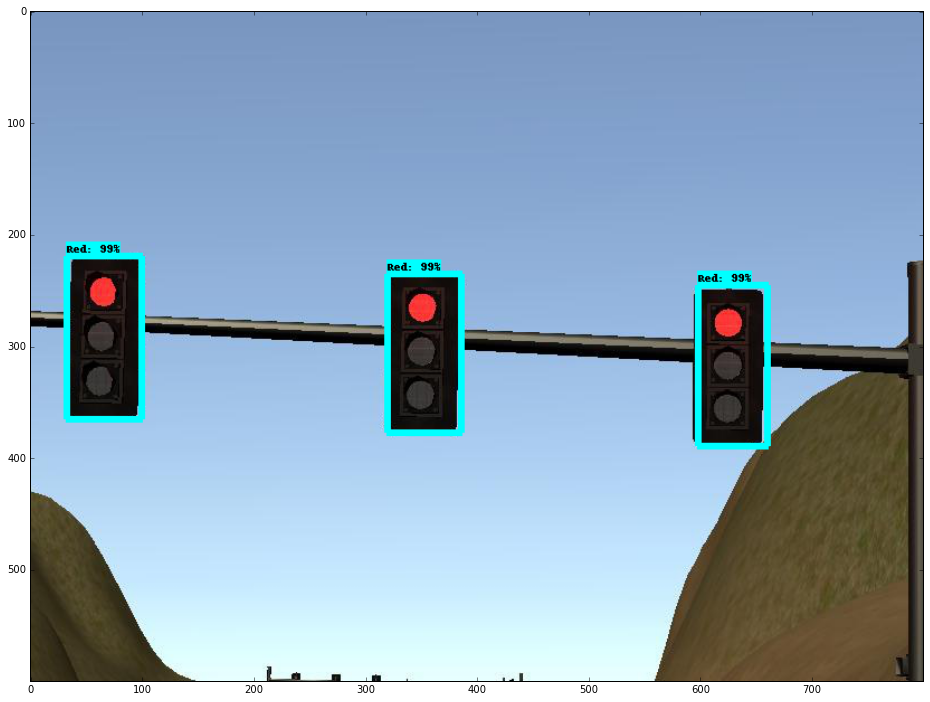

10


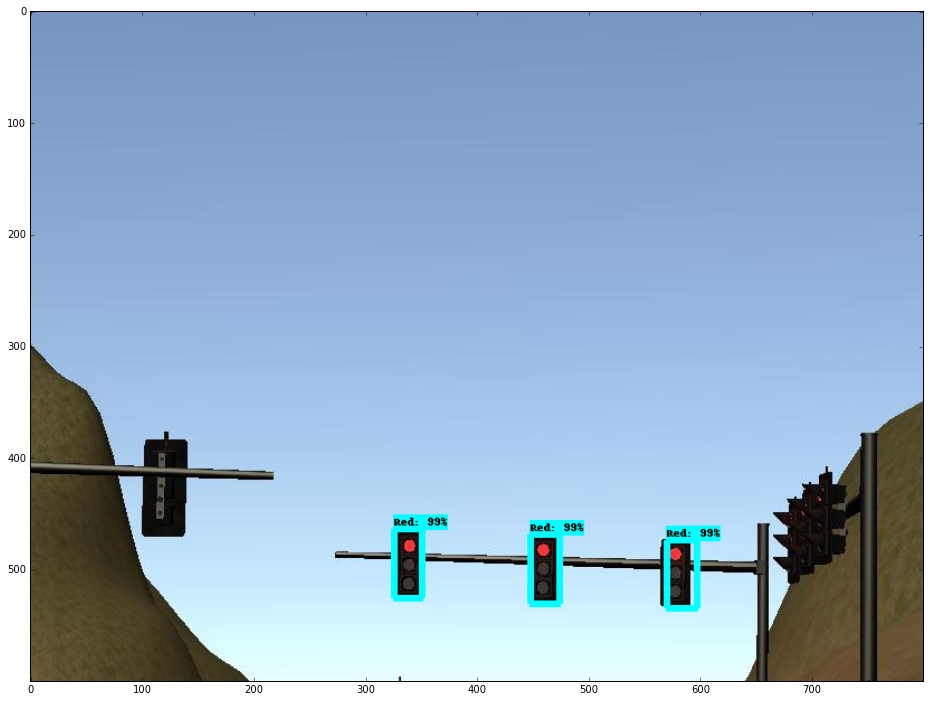

11


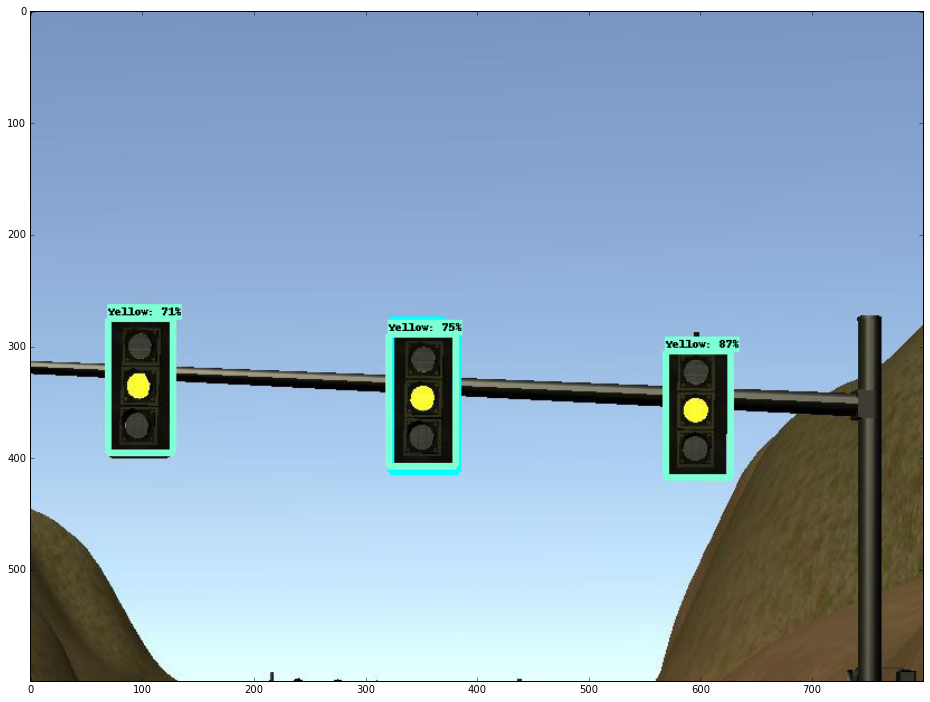

12


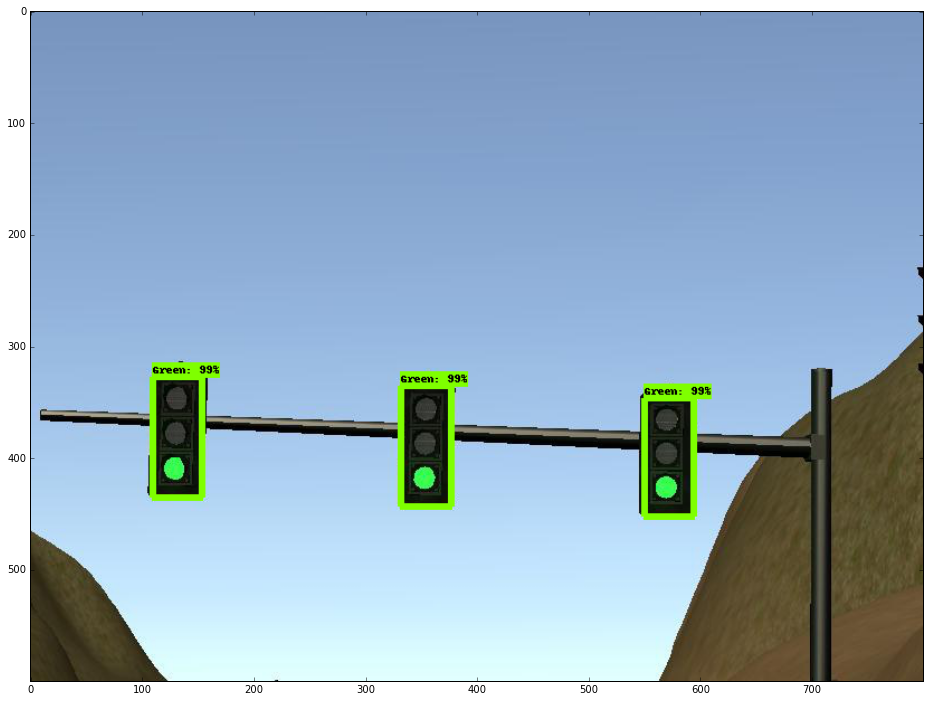

13


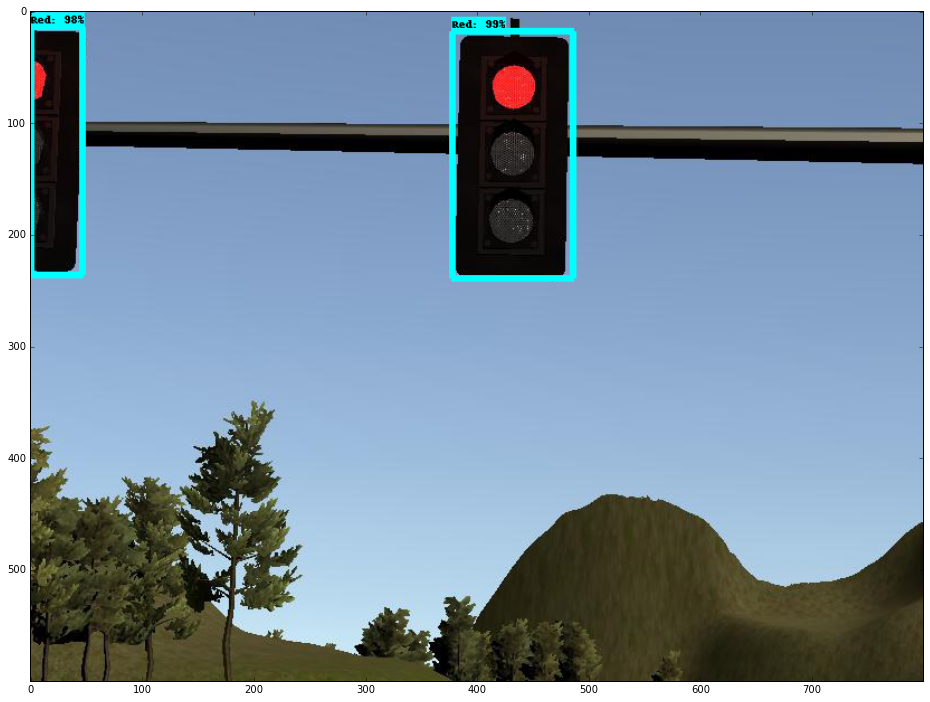

14


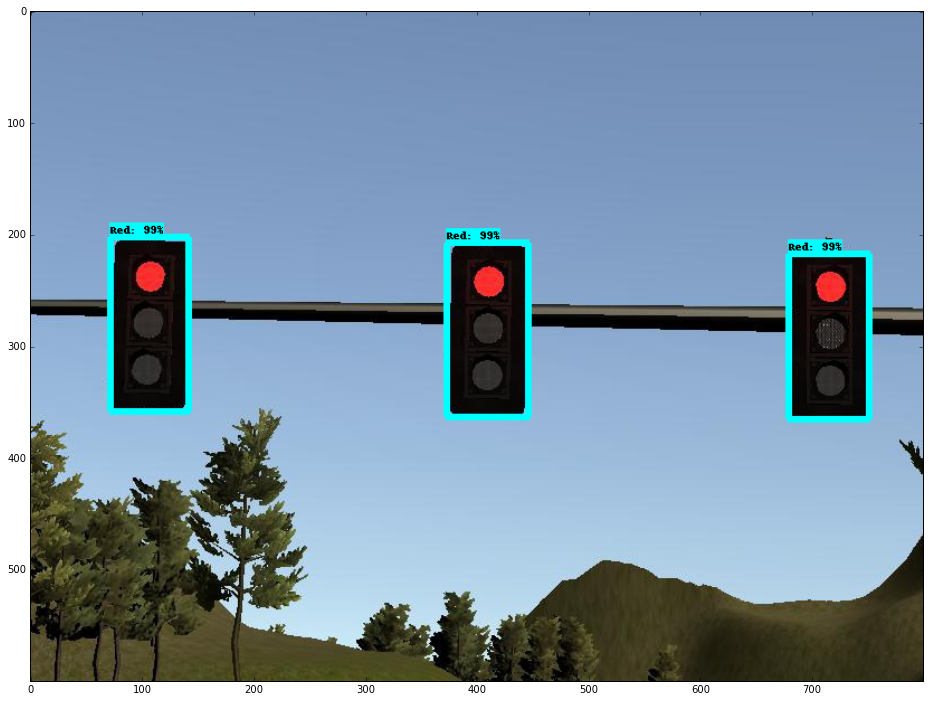

15


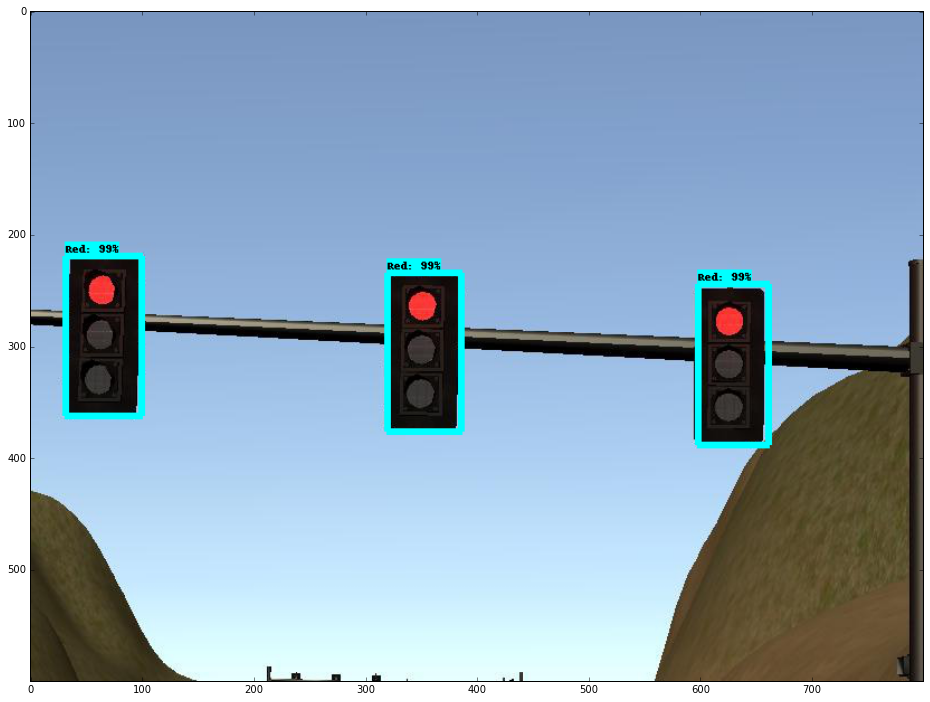

16


In [46]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor=detection_graph.get_tensor_by_name('image_tensor:0')
        detection_boxes= detection_graph.get_tensor_by_name('detection_boxes:0')
        detection_scores=detection_graph.get_tensor_by_name('detection_scores:0')
        detection_classes=detection_graph.get_tensor_by_name('detection_classes:0')
        num_detection=detection_graph.get_tensor_by_name('num_detections:0')
        count=0
        
        for image_path in TEST_IMAGE_PATHS:
            image=Image.open(image_path)
            image_np= load_image_into_numby_array(image)
            image_np_expanded= np.expand_dims(image_np,axis=0)
            
            time_1= time.time()
            
            (boxes, scores, classes, number)= sess.run([detection_boxes,detection_scores
                                                       ,detection_classes,num_detection],
                                                      feed_dict={image_tensor:image_np_expanded})
            time_2=time.time()
            
            boxes=np.squeeze(boxes)
            scores=np.squeeze(scores)
            classes=np.squeeze(classes)
            classes=classes.astype(int)
            
#             print(len(scores))
#             print(len(classes))
            
#             print(scores[0:3]*100)
#             print(classes)
                       
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np,
                boxes,
                classes,
                scores,
                categories_index,
                use_normalized_coordinates=True,
                line_thickness=6)
            
            plt.figure(figsize=Images_Size)
            plt.imshow(image_np)
            plt.show()
            
            img =Image.fromarray(image_np)
            draw = ImageDraw.Draw(img)

            font = ImageFont.truetype("/usr/share/fonts/truetype/freefont/FreeMono.ttf", 20)
            draw.text((0, 0),"Fast-RCNN",(255,255,255),font=font)
            
            img.save("data/results/image_sim_frcnn%s.jpg"%count)
            count=count+1
            print(count)
            
#             min_score=.10
            
            
#             for i in range(len(boxes)):     
#                 if scores is None or scores[i]> min_score:
#                     class_name= categories_index[classes[i]]['name']
#                     print('{}'.format(class_name), scores[i])
#                     print("Time in milliseconds", (time_2 - time_1) * 1000, "\n")
#                     outpath="data/result/image_%s" % (i)
#                     im =Image.fromarray(image_np)
                   
#                     im.save("data/results/image_%s.jpg"%count,"JPEG")
#                     count+=1
            
            
            